In [1]:
import json
with open('schulen.json') as f:
    schulen = json.load(f)

In [232]:
import osmnx as ox
# get the building footprints in Macclesfield
place = "Landkreis Breisgau-Hochschwarzwald"
place = "Stadt Freiburg"
#tags = {'building': 'school'}
# Ebene Landkreis
tags = {'admin_level': '6'}
#gdf = ox.geometries_from_place(place, tags)

#tags = {'boundary': 'administrative'}   

bh_osmid='R1946367'
fr_osmid='R62768'
lk_bh=ox.geocode_to_gdf(fr_osmid, by_osmid=True)
lk_bh_poly=lk_bh.geometry[0]

In [233]:
# Ebene Gemeinde
tags = {'admin_level': '8'}
gdf =ox.features.features_from_polygon(lk_bh_poly,tags)

In [234]:
in_bh=gdf.within(lk_bh_poly)
gem_in_bh_gdf=gdf[in_bh & (gdf['name'].notnull()) & (gdf['type'] == 'boundary') ]  

In [237]:
lk_bh

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((7.66201 47.96565, 7.66475 47.96508, ...",48.071058,47.903578,7.930844,7.662006,111362751,relation,62768,47.99609,7.8494,boundary,administrative,12,0.669959,city,Freiburg im Breisgau,"Freiburg im Breisgau, Baden-Württemberg, Germany"


In [8]:
eki=gem_in_bh_gdf[gem_in_bh_gdf["name"]=='Ehrenkirchen']

<Axes: >

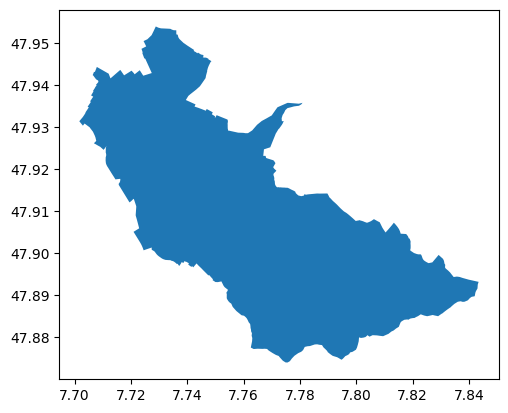

In [9]:
eki.plot()

In [9]:
## Findet alle Teilorte
#in_bh_gdf.plot()
tags = {'boundary': 'administrative'}
gem_bh_gdf =ox.features.features_from_polygon(eki_poly,tags)
in_bh=gem_bh_gdf.within(eki_poly)
ort_in_eki_gdf=gem_bh_gdf[in_bh & (gem_bh_gdf['name'].notnull()) & (gem_bh_gdf['type'] == 'boundary') & gem_bh_gdf['de:regionalschluessel'].isnull()] 


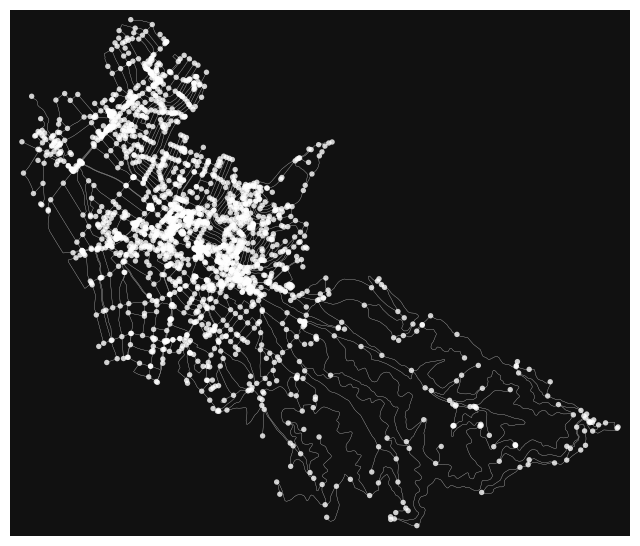

In [10]:
figure, axes = ox.plot_graph(
    gdf_eki_walk,
    #ax=axe,
    #node_color=nc,
    #node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
    show=False, 
    close=False
)

In [11]:
ort_in_eki_gdf

boundary          name source  \
element_type osmid                                          
relation     68452    administrative   Scherzingen    NaN   
             68453    administrative     Norsingen    NaN   
             68467    administrative  Ehrenstetten    NaN   
             301776   administrative   Offnadingen    NaN   
             1946222  administrative    Kirchhofen    NaN   

                                                               geometry note  \
element_type osmid                                                             
relation     68452    POLYGON ((7.72741 47.94288, 7.72512 47.94628, ...  NaN   
             68453    POLYGON ((7.71759 47.94234, 7.71763 47.94235, ...  NaN   
             68467    POLYGON ((7.72214 47.90799, 7.7222 47.908, 7.7...  NaN   
             301776   POLYGON ((7.70169 47.93141, 7.70294 47.93242, ...  NaN   
             1946222  MULTIPOLYGON (((7.7114 47.92558, 7.71138 47.92...  NaN   

                     alt_name    name:gsw   wikidata wikipedia     name:de  \
element_type osmid                                                           
relation     68452        NaN   Scherzige        NaN       NaN         NaN   
             68453        NaN   Norschige        NaN       NaN         NaN   
             68467        NaN         NaN        NaN       NaN         NaN   
             301776       NaN         NaN        NaN       NaN         NaN   
             1946222      NaN  Chilchhofe  Q20615851       NaN  Kirchhofen   

                      ... de:amtlicher_gemeindeschluessel name:suffix  \
element_type osmid    ...                                               
relation     68452    ...                             NaN         NaN   
             68453    ...                             NaN         NaN   
             68467    ...                             NaN         NaN   
             301776   ...                             NaN         NaN   
             1946222  ...                             NaN         NaN   

                     postal_code postal_code_level TMC:cid_58:tabcd_1:Class  \
element_type osmid                                                            
relation     68452           NaN               NaN                      NaN   
             68453           NaN               NaN                      NaN   
             68467           NaN               NaN                      NaN   
             301776          NaN               NaN                      NaN   
             1946222         NaN               NaN                      NaN   

                     TMC:cid_58:tabcd_1:LCLversion  \
element_type osmid                                   
relation     68452                             NaN   
             68453                             NaN   
             68467                             NaN   
             301776                            NaN   
             1946222                           NaN   

                     TMC:cid_58:tabcd_1:LocationCode website contact:phone  \
element_type osmid                                                           
relation     68452                               NaN     NaN           NaN   
             68453                               NaN     NaN           NaN   
             68467                               NaN     NaN           NaN   
             301776                              NaN     NaN           NaN   
             1946222                             NaN     NaN           NaN   

                     contact:website  
element_type osmid                    
relation     68452               NaN  
             68453               NaN  
             68467               NaN  
             301776              NaN  
             1946222             NaN  

[5 rows x 30 columns]

In [12]:
type(gdf_eki_build)

geopandas.geodataframe.GeoDataFrame

In [240]:
gem_in_bh_gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((7.66201 47.96565, 7.66475 47.96508, ...",48.071058,47.903578,7.930844,7.662006,111362751,relation,62768,47.99609,7.8494,boundary,administrative,12,0.669959,city,Freiburg im Breisgau,"Freiburg im Breisgau, Baden-Württemberg, Germany"


In [65]:
from shapely.geometry import Point
import networkx as nx
node_colors = {}
node_time = {}
for cur in (schulen["schools"]):
    p=Point(cur["lng"],cur["lat"])
    #if p.within(eki_poly).any(): 
    if p.within(eki_poly): 
        poi=ox.distance.nearest_nodes(gdf_eki_walk, cur["lng"],cur["lat"])
        for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
            subgraph = nx.ego_graph(gdf_eki_walk, poi, radius=trip_time, distance="time")
            for node in subgraph.nodes():
                col_old=0
                if node in node_colors:
                    col_old=sum(node_colors[node])
                if sum(color)>col_old:
                    node_colors[node] = color
                col_time=10000000
                if node in node_time:
                    col_time=node_time[node]
                if trip_time<col_time:
                    node_time[node] = trip_time                    

In [ ]:
import pandas as pd
import numpy
from shapely.geometry import Point
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

network_type = "walk"
trip_times = [5, 10, 15, 20, 25,30,40]  # in minutes
travel_speed = 3  # walking speed in km/hour
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)
cmap = matplotlib.cm.cool
norm = matplotlib.colors.BoundaryNorm(trip_times, cmap.N)

sc=[]
for cur in (schulen["schools"]):
    p=Point(cur["lng"],cur["lat"])
    sc=sc+[[p,cur["name"]]]

if len(gem_in_bh_gdf)==0:
    gem_in_bh_gdf=lk_bh

alle_gem=pd.DataFrame()
for index_gem,row_gem in gem_in_bh_gdf.iterrows():
    gem_name=row_gem['name']
    #if gem_name=='Merdingen':
    if 1==1:
    
        gem_poly=row_gem.geometry
    
        tags = {'landuse':['residential','farmyard','industrial','commercial']}
        gdf_gem_lu =ox.features.features_from_polygon(gem_poly,tags)
        #tags = {'building': True}  
        #gdf_gem_build=ox.features_from_polygon(gem_poly,tags)
        tags = {'addr:housenumber': True}
        gdf_gem_hn=ox.features_from_polygon(gem_poly,tags)
        gdf_gem_hn['triptime']=120
        
        gdf_gem_walk=ox.graph_from_polygon(gem_poly,network_type=network_type)
        
        # add an edge attribute for time in minutes required to traverse each edge
        meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
        for _, _, _, data in gdf_gem_walk.edges(data=True, keys=True):
            data["time"] = data["length"] / meters_per_minute
    
        tags = {'boundary': 'administrative'}
        gem_bh_gdf =ox.features.features_from_polygon(gem_poly,tags)
        in_bh=gem_bh_gdf.within(gem_poly)
        ort_in_gem_gdf=gem_bh_gdf[in_bh & (gem_bh_gdf['name'].notnull()) & (gem_bh_gdf['type'] == 'boundary') & gem_bh_gdf['de:regionalschluessel'].isnull()] 

        t=pd.DataFrame({'GemName':[gem_name]})
        x=ort_in_gem_gdf['name'].values
        if gem_name not in x:
            x=numpy.append(x,[[gem_name]])
        ort=pd.DataFrame({'OrtName': x})
        #ort=pd.DataFrame[{'Name':x[0]}]
        y=numpy.unique(gdf_gem_lu['landuse'].values)
        y=numpy.append(y,[['unbekannt']])
        #y.append('unbekannt')
        landuse_df=pd.DataFrame({'Landuse': y})
        tt=pd.DataFrame({'WegeDauer':[0]+trip_times+[120]})
        
        res=pd.merge(ort,landuse_df, how='cross')
        res2=pd.merge(t,res, how='cross')
        boxen=pd.merge(res2,tt, how='cross')
        boxen=boxen.set_index(['GemName','OrtName','Landuse','WegeDauer'])
        boxen['Anzahl']=0
    
        
        
        node_colors = {}
        node_time = {}
        hn_colors = {}
        for cur in (schulen["schools"]):
            p=Point(cur["lng"],cur["lat"])
            if p.within(gem_poly): 
                poi=ox.distance.nearest_nodes(gdf_gem_walk, cur["lng"],cur["lat"])
                for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
                    subgraph = nx.ego_graph(gdf_gem_walk, poi, radius=trip_time, distance="time")
                    for node in subgraph.nodes():
                        col_old=0
                        if node in node_colors:
                            col_old=sum(node_colors[node])
                        if sum(color)>col_old:
                            node_colors[node] = color
                        col_time=10000000
                        if node in node_time:
                            col_time=node_time[node]
                        if trip_time<col_time:
                            node_time[node] = trip_time    
        for idx_build, row_build in gdf_gem_hn.iterrows():
            poly_build=row_build['geometry']
            #poly_ort = gpd.GeoSeries(row_orte['geometry'])
            p_center=poly_build.centroid
            poi=ox.distance.nearest_nodes(gdf_gem_walk, p_center.x,p_center.y)
            WegeDauer=120
            if poi in node_time:
                WegeDauer=node_time[poi]
            if poi in node_time:
                hn_colors[idx_build[1]]=node_colors[poi]
                gdf_gem_hn.loc[idx_build,['triptime']]=node_time[poi]
            
            Landuse='unbekannt'
            for idx_landuse, row_landuse in gdf_gem_lu.iterrows():
                lu_type=row_landuse['landuse']
                poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                if poly_lu.contains(p_center).any():
                    Landuse=lu_type
            Ortsteil=gem_name
            for idx_ort, row_ort in ort_in_gem_gdf.iterrows():
                poly_ortt = gpd.GeoSeries(row_ort['geometry'])
                if poly_ortt.contains(p_center).any():
                    Ortsteil=row_ort['name']    
            boxen.at[(gem_name,Ortsteil,Landuse,WegeDauer),'Anzahl']=boxen.at[(gem_name,Ortsteil,Landuse,WegeDauer),'Anzahl']+1
    
        boxen.to_csv('erstellte_daten/'+gem_name+'.csv',index=True)
        if len(alle_gem)<5:
            alle_gem=boxen
        else:
            alle_gem=alle_gem+boxen
        alle_gem.to_csv('erstellte_daten/'+place+'.csv',index=True)

        br=1
        anz=1

        gp_b=gem_poly.bounds[2]-gem_poly.bounds[0]
        gp_l=gem_poly.bounds[3]-gem_poly.bounds[1]
        md=max(gp_b,gp_l)
        size=40/md



     
        fig, axs = plt.subplots(anz,br,figsize=(int(gp_b*size), int(gp_l*size)))
        #fig, axs = plt.subplots(anz,br)
        axs.set_title(gem_name)
        for idx_orte, row_orte in ort_in_gem_gdf.iterrows():
            poly_ort = gpd.GeoSeries(row_orte['geometry'])
            p_center=poly_ort.centroid
            if gem_poly.contains(p_center).any():
                poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
                axs.annotate(text=row_orte["name"], xy=(p_center[0].x,p_center[0].y), horizontalalignment='center')
        if len(ort_in_gem_gdf)==0:
            gem_poly_gpd = gpd.GeoSeries(gem_poly)
            gem_poly_gpd.plot(ax=axs,facecolor='none', edgecolor='blue')    
        gdf_gem_hn.plot(ax=axs,column='triptime',markersize =5, cmap=cmap,norm=norm)
        #nc = [node_colors[node] if node in node_colors else "none" for node in gdf_gem_walk.nodes()]
        #ns = [5 if node in node_colors else 0 for node in gdf_gem_walk.nodes()]
        #poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
        fig, ax = ox.plot_graph(
            gdf_gem_walk,
            ax=axs,
            #node_color=nc,
            #node_size=ns,
            node_alpha=0.8,
            edge_linewidth=0.2,
            edge_color="#999999",
            show=False, 
            close=False
        )
        for cur in sc:
            axs.scatter(cur[0].x,cur[0].y,color='red',s=80)    
            axs.annotate(text=cur[1], xy=(cur[0].x,cur[0].y), horizontalalignment='center')
            #axs[sw//br,sw%br].set_ylim(poly_gem.bounds["miny"][0],poly_gem.bounds["maxy"][0])
            #axs[sw//br,sw%br].set_xlim(poly_gem.bounds["minx"][0],poly_gem.bounds["maxx"][0])
        plt.savefig('images/'+gem_name+'.png')
        #plt.show()



<Axes: >

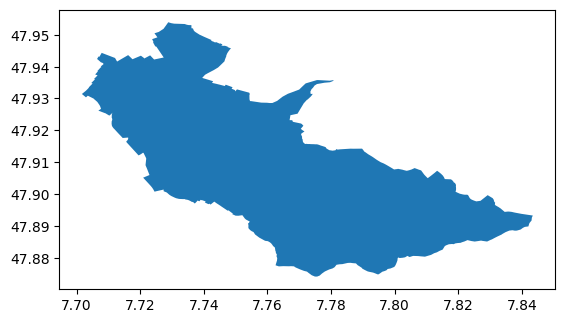

In [229]:
poly_gem_gpd.plot()

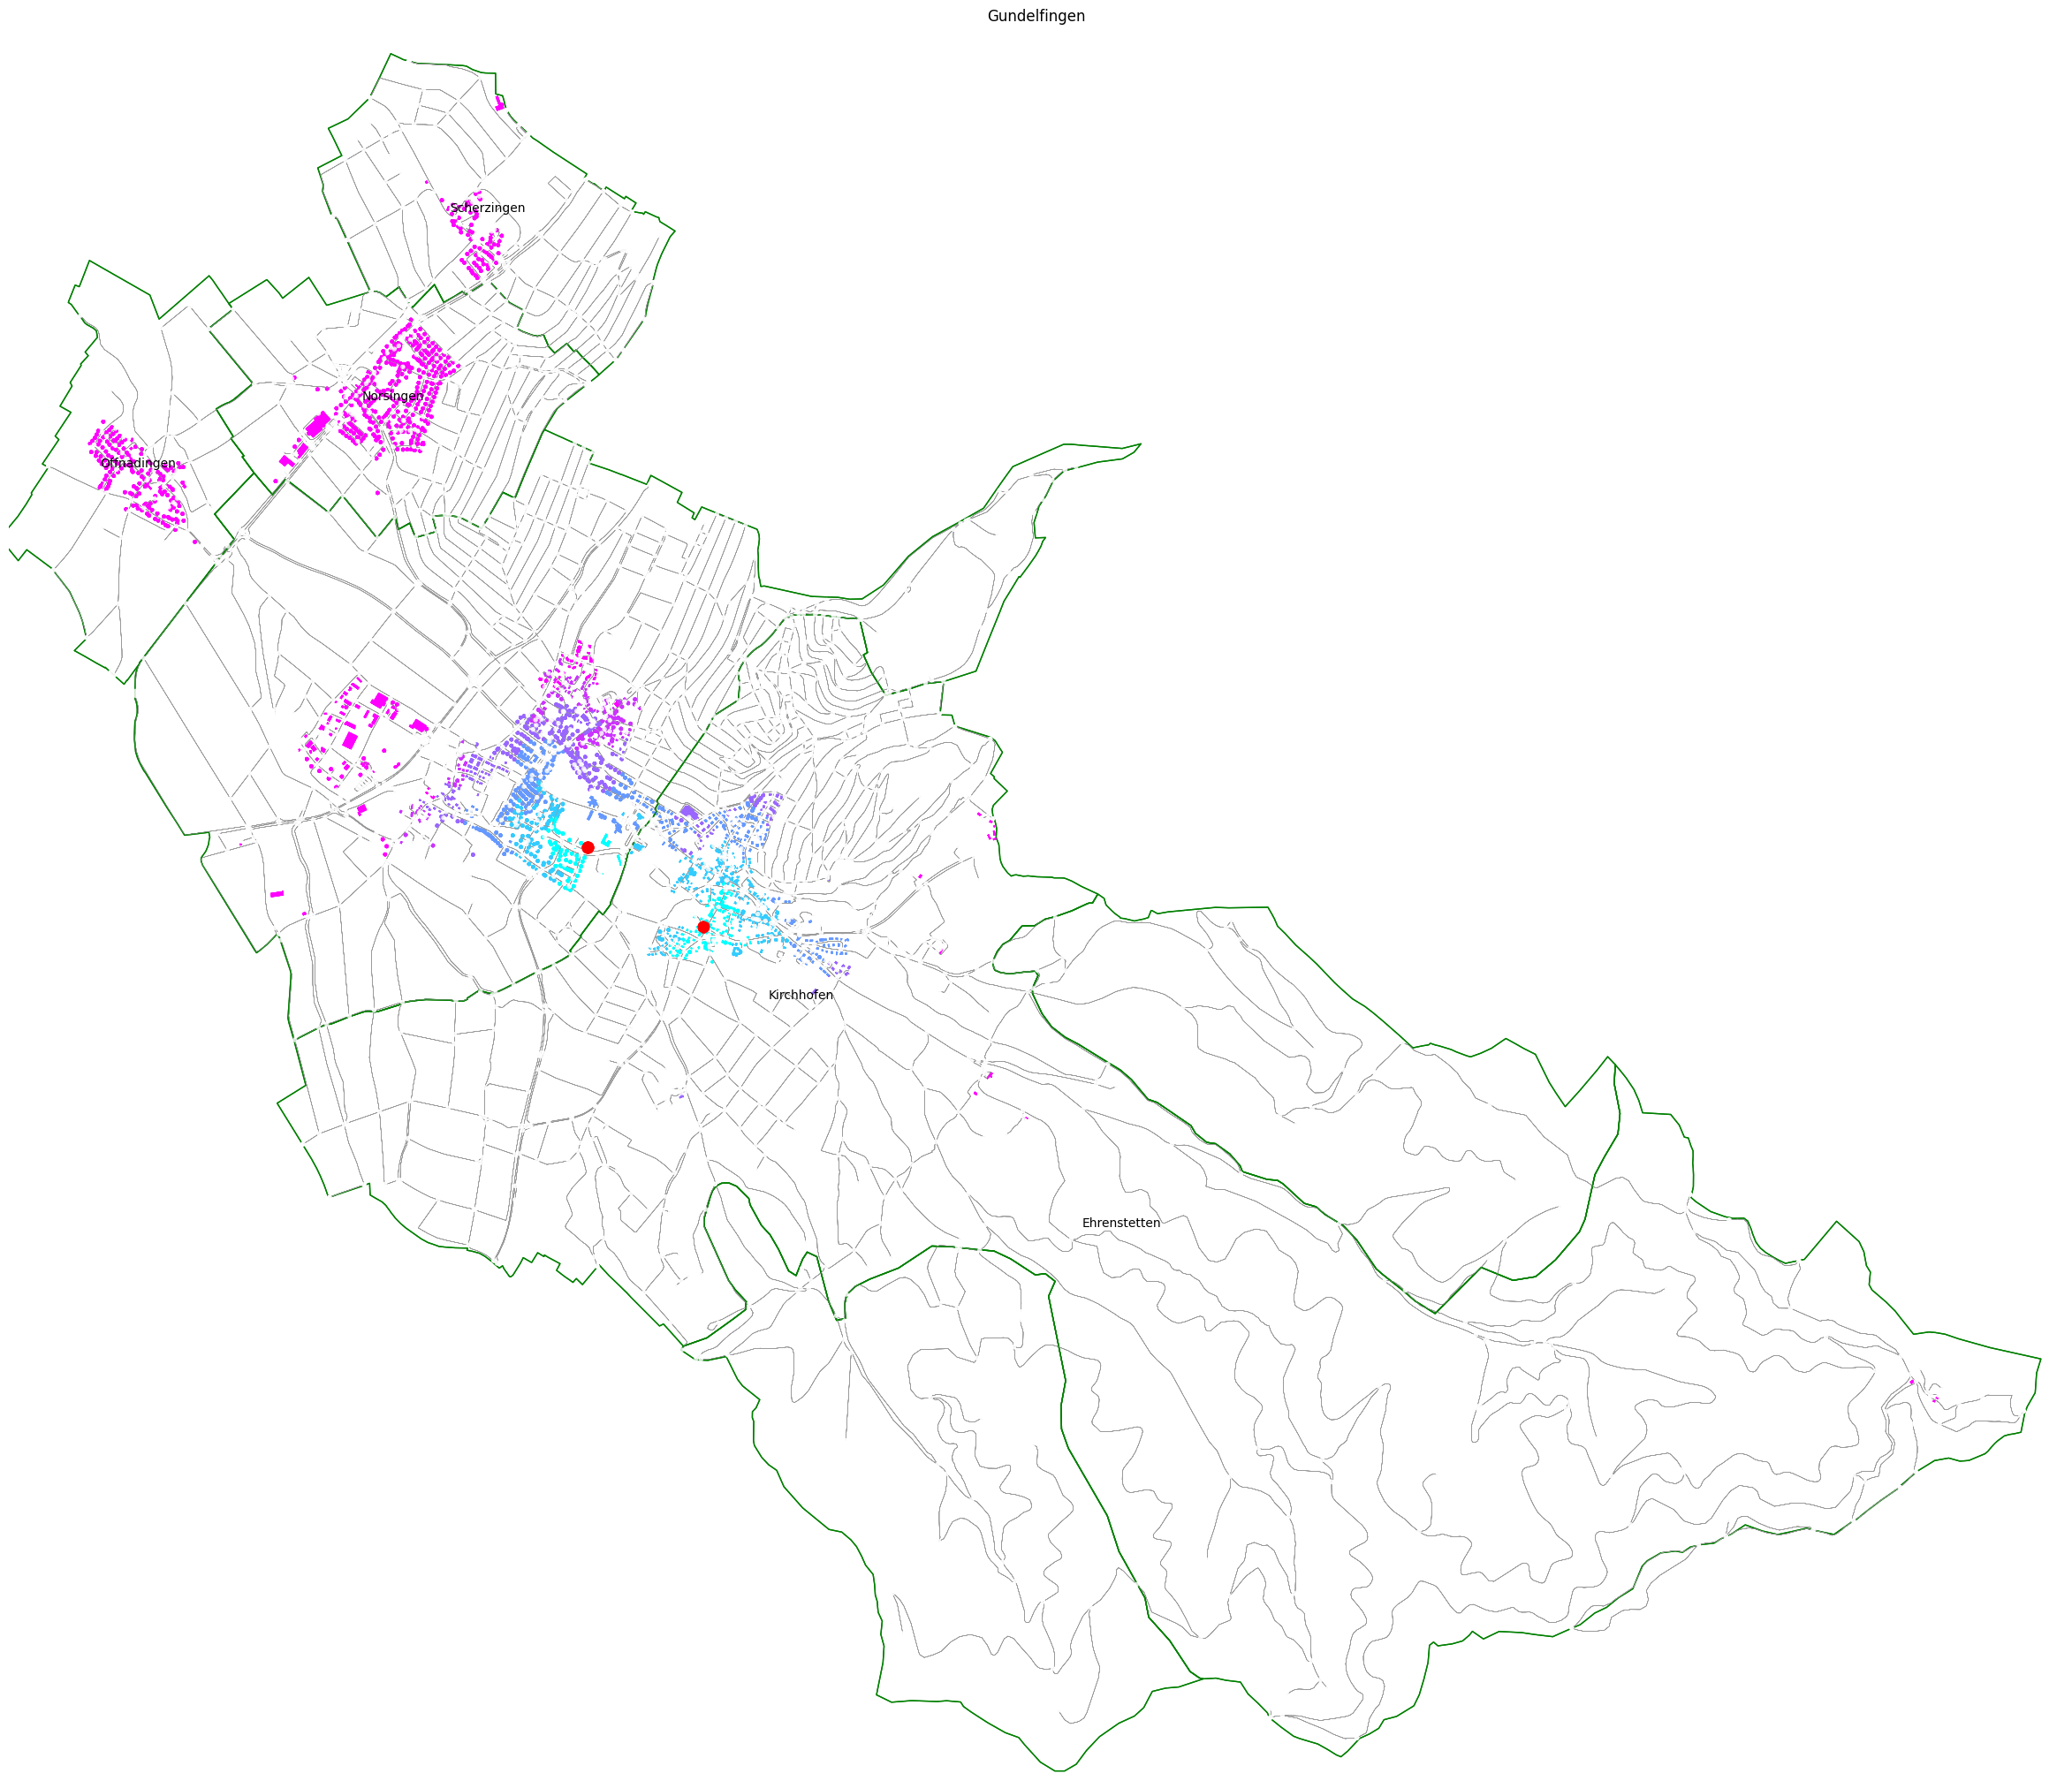

In [211]:
import networkx as nx
from shapely.geometry import Point
import matplotlib.pyplot as plt

trip_times = [5, 10, 15, 20, 25,30,40]
cmap = matplotlib.cm.cool
norm = matplotlib.colors.BoundaryNorm(trip_times, cmap.N)



br=1
anz=1
fig, axs = plt.subplots(anz,br,figsize=(30, 120))
sw=0
poly_gem = gem_poly
axs.set_title(gem_name)
for idx_orte, row_orte in ort_in_gem_gdf.iterrows():
    poly_ort = gpd.GeoSeries(row_orte['geometry'])
    p_center=poly_ort.centroid
    if poly_gem.contains(p_center).any():
        poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
        axs.annotate(text=row_orte["name"], xy=(p_center[0].x,p_center[0].y), horizontalalignment='center')
    gdf_gem_hn.plot(ax=axs,column='triptime',markersize =5, cmap=cmap,norm=norm)
    nc = [node_colors[node] if node in node_colors else "none" for node in gdf_gem_walk.nodes()]
    ns = [5 if node in node_colors else 0 for node in gdf_gem_walk.nodes()]
    poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
    fig, ax = ox.plot_graph(
        gdf_gem_walk,
        ax=axs,
        #node_color=nc,
        #node_size=ns,
        node_alpha=0.8,
        edge_linewidth=0.2,
        edge_color="#999999",
        show=False, 
        close=False
    )
    for cur in sc:
        axs.scatter(cur.x,cur.y,color='red',s=80)
    #axs[sw//br,sw%br].set_ylim(poly_gem.bounds["miny"][0],poly_gem.bounds["maxy"][0])
    #axs[sw//br,sw%br].set_xlim(poly_gem.bounds["minx"][0],poly_gem.bounds["maxx"][0])
#plt.savefig('images/'+gem_name+'.png')
plt.show()

In [42]:
#hn_colors_series = pd.DataFrame.from_dict(hn_colors,orient='index')
#hn_colors_series

colors = map(lambda x: hn_colors.get(x, (0.5,0.5,0.5,1)), gdf_gem_hn.index.get_level_values(1))

In [50]:
#hn_colors
for cur in gdf_gem_hn.index:
    osmid =cur[1] 
    #print (cur[1])
    if osmid in hn_colors:
        print(hn_colors[osmid])

In [57]:
idx_build.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [242]:
hc = [hn_colors[node] if node in hn_colors else "none" for node in hn_colors.nodes()]


networkx.classes.multidigraph.MultiDiGraph

In [93]:
gdf_gem_hn.loc[idx_build,['triptime']]=15

In [97]:
gdf_gem_hn.loc[idx_build,['triptime']]=node_time[poi]

In [155]:
gdf_gem_hn['tripkat']

element_type  osmid     
node          243524683      30.0
              243524684      20.0
              243524698      25.0
              243527948      15.0
              257467957       5.0
                            ...  
way           1019935176     25.0
              1027520621     40.0
              1028761363    120.0
              1183355579     30.0
relation      3248696        40.0
Name: tripkat, Length: 822, dtype: float64

In [200]:
        gp_b=gem_poly.bounds[2]-gem_poly.bounds[0]
        gp_l=gem_poly.bounds[3]-gem_poly.bounds[1]
        md=max(gp_b,gp_l)
        size=40/md
int(gp_b*size)
int(gp_l*size)

22

In [217]:
sc=[]
for cur in (schulen["schools"]):
    p=Point(cur["lng"],cur["lat"])
    #if p.within(eki_poly).any(): 
    if p.within(gem_poly): 
        p=Point(cur["lng"],cur["lat"])
        sc=sc+[[p,cur["name"]]]
sc        

[[<POINT (7.751 47.913)>, 'Jengerschule Gemeinschaftsschule'],
 [<POINT (7.743 47.917)>, 'Jengerschule Gemeinschaftsschule']]

In [219]:
for cur in sc:
    print(cur[0].x,cur[1])

7.7505589 Jengerschule Gemeinschaftsschule
7.742523 Jengerschule Gemeinschaftsschule


In [138]:
import matplotlib
matplotlib.colors.rgb_to_hsv([0.050383, 0.029803, 0.527975])

array([0.67355184, 0.94355225, 0.527975  ])

In [197]:
max((gem_poly.bounds[2]-gem_poly.bounds[0]),(gem_poly.bounds[3]-gem_poly.bounds[1]))

0.14172459999999987